In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import os
from matplotlib.ticker import ScalarFormatter
from scipy.interpolate import CubicSpline
from my_plot import set_size
import seaborn as sns
width =  508.0
widthcol = 244
plt.rcParams['font.size']=12

%matplotlib widget

In [12]:


tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

#plt.rcParams.update(tex_fonts)

In [13]:
def sci_notation(x):
    if x == 0:
        return "0"
    else:
        formatted = f"{x:.2e}"  # Converte in notazione scientifica
        coefficient, exponent = formatted.split('e')
        exponent = int(exponent)  # Converti l'esponente a intero
        coefficient=float(coefficient)
        if (coefficient == 1.00):
            return f"$ 10^{{{exponent}}}$"  # Notazione LaTeX
        else: 
            return f"${coefficient} \\times 10^{{{exponent}}}$"  # Notazione LaTeX
    

In [14]:
colors1=sns.color_palette("rocket",6) #personal fav 
colors2=sns.color_palette("mako",6) #also nice
colors3 = plt.colormaps['Spectral'].resampled(5)

#Ram's colors, if desired
colors4 = ['#c3121e', '#0348a1', '#ffb01c', '#027608', '#0193b0', '#9c5300', '#949c01', '#7104b5']
#            0sangre,   1neptune,  2pumpkin,  3clover,   4denim,    5cocoa,    6cumin,    7berry

In [15]:
zh = [0,1e6,1e5,1e4,1e3,1e2]

In [16]:
folder = 'outputs/xe-evolution'
Xe = []
z= []
for i in [0,6,5,4,3,2]:
    file_path3 = os.path.join(folder, f"Xi.delta-z{i}.dat")

#for i in range(len(zh)):
#    file_path3 = os.path.join(folder, f"Xi.delta-z_z_heat_00{i}.dat")
    op3 = pd.read_csv(file_path3, skiprows=6, delimiter=' ', header=None)

    #g = op3.iloc[:,3]
    g = op3.iloc[:,1]
    Xe.append(g)
    e = op3.iloc[:,0]
    z.append(e)


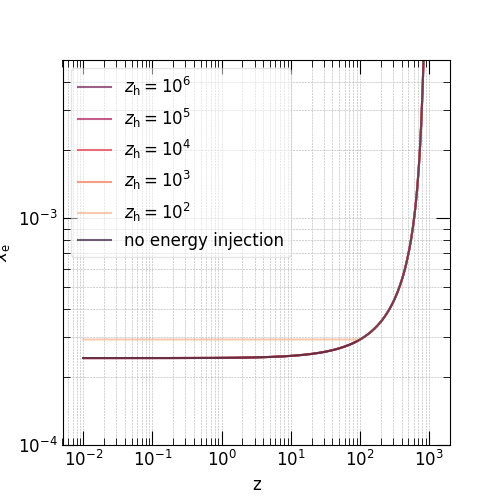

In [17]:
lines =  ['-', '-', '-', '-','--']

fig, ax= plt.subplots( figsize=(5,5))


for i in range(len(zh)-1):
    ax.loglog(z[i+1], Xe[i+1], label= f"$z_{{\\rm h}}=${sci_notation(zh[i+1])}", color = colors1[i+1], alpha = 0.7)
ax.loglog(z[0], Xe[0], label= "no energy injection", color = colors1[0], alpha = 0.7)

ax.set_xlim([0.005, 2e3])
ax.set_ylim([1e-4, 5e-3])
plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
#xticks = np.arange(0, 1e4,10)
#yticks = np.logspace(1e-2,1e3,6)

plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)
plt.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
plt.legend(loc='best',fancybox=True, framealpha=0.5)
#plt.xticks(xticks)
#plt.yticks(yticks)
ax.set_xlabel("z",fontsize=12)
ax.set_ylabel("$x_{\\rm e}$",fontsize=12)

plt.savefig('outputs/p4p/xe.pdf', dpi=300,bbox_inches="tight")
plt.show()

In [18]:
DT = []
z= []
for i in [0,6,5,4,3,2]:
    file_path3 = os.path.join(folder, f"Temperatures.delta-z{i}.dat")
#for i in range(len(zh)):
#    file_path3 = os.path.join(folder, f"Temperatures.delta-z_z_heat_00{i}.dat")
    op3 = pd.read_csv(file_path3, skiprows=6, delimiter=' ', header=None)

    g = op3.iloc[:,6]
    DT.append(g)
    e = op3.iloc[:,0]
    z.append(e)

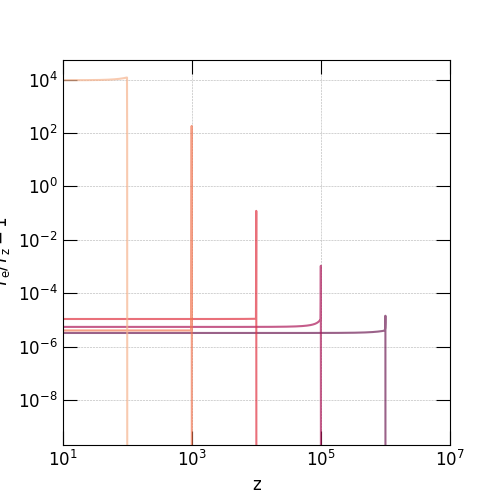

In [19]:
lines =  ['-', '--', ':', '-.','-']

fig, ax= plt.subplots( figsize=(5,5))


for i in range(len(zh)-1):
    ax.loglog(z[i+1], DT[i+1], label= f"$z_{{\\rm h}}=${sci_notation(zh[i+1])}", color = colors1[i+1], alpha = 0.7)
ax.loglog(z[0], DT[0], label= "no energy injection", color = colors1[0], alpha = 0.7)

ax.set_xlim([10, 1e7])
#ax.set_ylim([1e-4, 5e-3])
plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
#xticks = np.arange(0, 1e4,10)
#yticks = np.logspace(1e-2,1e3,6)

plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)
plt.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
#plt.legend(loc='best',fancybox=True, framealpha=0.5)
#plt.xticks(xticks)
#plt.yticks(yticks)
ax.set_xlabel("z",fontsize=12)
ax.set_ylabel("$T_{\\rm e} / T_{\\rm z} - 1$",fontsize=12)

plt.savefig('outputs/p4p/Te.pdf', dpi=300,bbox_inches="tight")
plt.show()

In [20]:
DT[1]

0      -0.000002
1      -0.000002
2      -0.000002
3      -0.000002
4      -0.000002
          ...   
2153    0.000003
2154    0.000003
2155    0.000003
2156    0.000003
2157    0.000003
Name: 6, Length: 2158, dtype: float64